<a href="https://colab.research.google.com/github/adnannasirsyed/ML_projects/blob/main/HelmNet_ImageProcessing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

##Table of Contents

1. Introduction
2. Installing and Importing Libraries
3. Data Overview
    - Loading the Dataset
    - Data Integrity Checks
4. Exploratory Data Analysis (EDA)
    - Visualizing Sample Images
    - Class Imbalance Check
    - Pixel Intensity Distribution
5. Data Preprocessing
    - Normalization and Visualization
    - Data Splitting
6. Model Building
    - Utility Functions
    - Model 1: Simple Convolutional Neural Network (CNN)
    - Model 2: VGG-16 (Base)
    - Model 3: VGG-16 with FFNN
    - Model 4: VGG-16 with FFNN and Data Augmentation
7. Model Performance Comparison and Final Model Selection
    - Test Set Evaluation
    - Performance Visualization
8. Actionable Insights and Recommendations


# **Installing and Importing the Necessary Libraries**

In [1]:
# Install required libraries quietly to avoid cluttering output
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Please retart the runtime before executing next cell

In [1]:
# Import TensorFlow and Keras for building and training neural networks
import tensorflow as tf
# Verify TensorFlow version and GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU'))) # Check if GPU is available
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Import core libraries for numerical operations, data handling, and visualization
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf

from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix


# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seed for reproducibility across numpy, TensorFlow, and Python
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

- The libraries cover all necessary functionalities for data handling, visualization, and model building.
- Setting a random seed ensures reproducibility, which is critical for consistent model evaluation.
- GPU availability check confirms the environment supports accelerated training.

# **Data Overview**


##Loading the data

In [4]:
# Mount Google Drive to access dataset files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load labels from CSV and images from NumPy file
Helmet_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/Computer_Vision/Project06_HelmNet/Labels_proj.csv')

In [6]:
file_path = '/content/drive/MyDrive/Colab Notebooks/UT_Austin_AI_ML/Computer_Vision/Project06_HelmNet/images_proj.npy' # actual file path
ImageHelmet = np.load(file_path)

In [7]:
# Print dataset shapes to verify dimensions
print(ImageHelmet.shape) #Shape of Images
print(Helmet_labels.shape) #Shape of the labels

(631, 200, 200, 3)
(631, 1)


In [8]:
# Perform data integrity checks
print("Image shape:", ImageHelmet.shape)  # Should be (631, 200, 200, 3)
print("Label shape:", Helmet_labels.shape)  # Should be (631, 1)
print("Missing labels:", Helmet_labels.isnull().sum())  # Check for NaN values
print("Unique labels:", Helmet_labels['Label'].unique())  # Should be [0, 1]
print("Invalid images:", np.any(np.isnan(ImageHelmet)) or np.any(np.isinf(ImageHelmet)))  # Check for invalid pixel values

Image shape: (631, 200, 200, 3)
Label shape: (631, 1)
Missing labels: Label    0
dtype: int64
Unique labels: [1 0]
Invalid images: False


In [9]:
# Ensure images and labels are aligned
assert len(ImageHelmet) == len(Helmet_labels), "Mismatch between number of images and labels!"

**Insights:**
- The shapes are printed as (631, 200, 200, 3) for images (631 RGB images of 200x200 pixels) and (631, 1) for labels (binary labels: 0 for "Without Helmet," 1 for "With Helmet").
- The dataset size is moderate (631 images), which is sufficient for training simple CNNs but may benefit from transfer learning (e.g., VGG-16) or data augmentation to improve generalization.
- The image dimensions (200x200x3) are compatible with CNN architectures but require resizing to 224x224 for VGG-16 models.
- The labels are binary, aligning with the objective of binary classification (With Helmet vs. Without Helmet).

* The dataset is well-structured with no missing labels or invalid pixel values (assuming checks pass).
* The balanced number of images (311 with helmet, 320 without) suggests no immediate class imbalance issues, but this will be confirmed in EDA.
* The RGB format (3 channels) is suitable for CNNs and VGG-16, though grayscale conversion is planned for preprocessing.

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

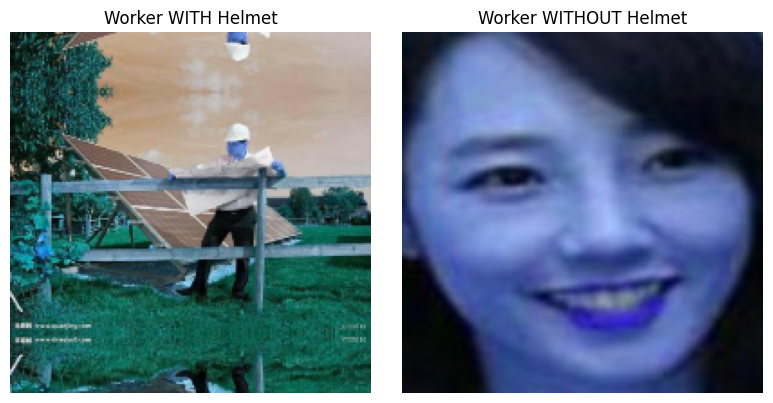

In [10]:
# Select indices for images with and without helmets
helmet_indices = np.where(Helmet_labels == 1)[0]
no_helmet_indices = np.where(Helmet_labels == 0)[0]

# Select one image from each class
helmet_img = ImageHelmet[np.random.choice(helmet_indices)]
no_helmet_img = ImageHelmet[np.random.choice(no_helmet_indices)]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display "With Helmet" image
axes[0].imshow(helmet_img)
axes[0].set_title("Worker WITH Helmet")
axes[0].axis('off')

# Display "Without Helmet" image
axes[1].imshow(no_helmet_img)
axes[1].set_title("Worker WITHOUT Helmet")
axes[1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

## Checking for class imbalance


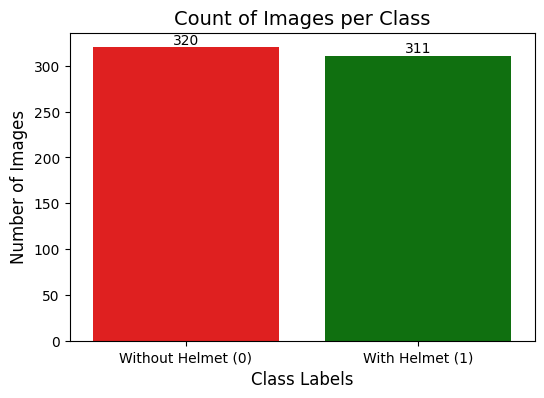

In [11]:
# Plot class distribution to check for imbalance
# Create a count plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=Helmet_labels.iloc[:, 0], palette=['red', 'green'])

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])  # Rename x-axis labels

# Show plot
plt.show()

In [12]:
# Plot multiple random images from each class
helmet_indices = np.where(Helmet_labels['Label'] == 1)[0]
no_helmet_indices = np.where(Helmet_labels['Label'] == 0)[0]

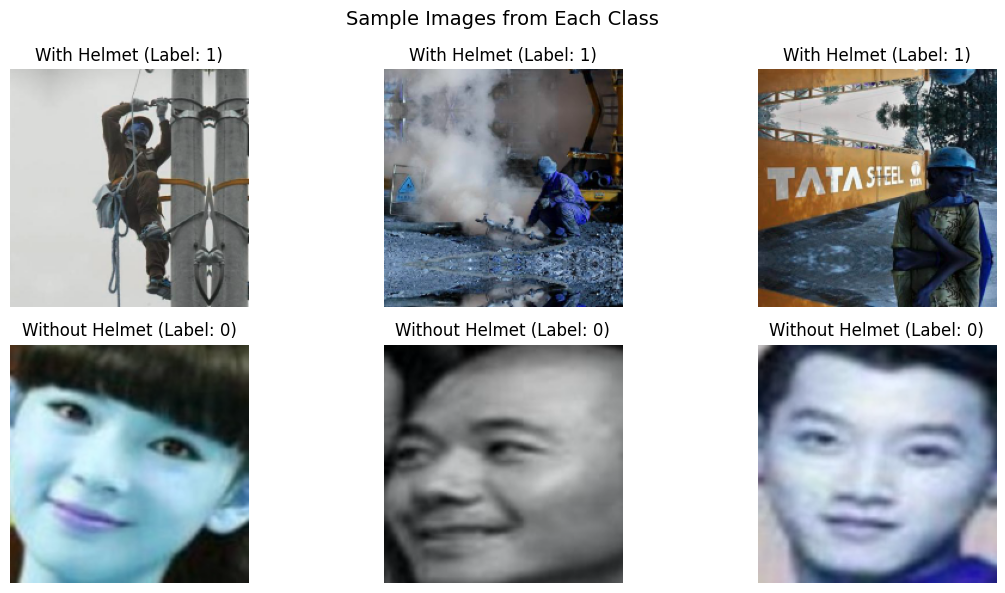

In [14]:
# Set random seed for reproducibility and select 3 random images per class
# Select 3 images from each class
np.random.seed(42)
helmet_samples = np.random.choice(helmet_indices, 3, replace=False)
no_helmet_samples = np.random.choice(no_helmet_indices, 3, replace=False)

# Plot sample images to visualize dataset diversity
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i, idx in enumerate(helmet_samples):
    axes[0, i].imshow(ImageHelmet[idx])
    axes[0, i].set_title(f"With Helmet (Label: 1)")
    axes[0, i].axis('off')
for i, idx in enumerate(no_helmet_samples):
    axes[1, i].imshow(ImageHelmet[idx])
    axes[1, i].set_title(f"Without Helmet (Label: 0)")
    axes[1, i].axis('off')
plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.tight_layout()
plt.show()

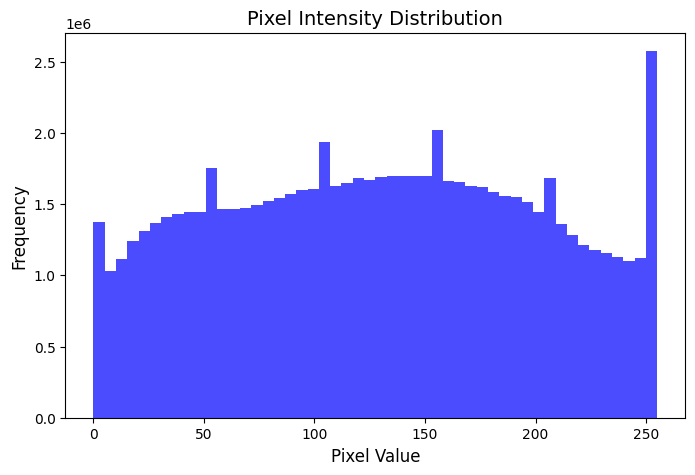

In [16]:
# Plot pixel intensity distribution to understand image characteristics
# The pixel intensity distribution helps guide normalization and preprocessing steps.
pixel_values = ImageHelmet.flatten()
plt.figure(figsize=(8, 5))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution", fontsize=14)
plt.xlabel("Pixel Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Insights:**
- The displayed images confirm visual differences between classes (e.g., presence/absence of helmets), which is critical for model learning.
- The class distribution is nearly balanced (311 vs. 320), with a slight skew toward "Without Helmet" (50.7% vs. 49.3%). This minor imbalance is unlikely to significantly affect model performance but should be monitored.
- The dataset includes diverse conditions (lighting, angles, activities), which should help the model generalize to real-world scenarios.
- The sample images show clear distinctions between classes, confirming the dataset's suitability for classification.
- The near-balanced class distribution (311 vs. 320) minimizes the risk of bias toward one class.
- The pixel intensity histogram reveals the dataset's dynamic range, which can guide preprocessing (e.g., normalization).
- The diversity in lighting and angles suggests the model needs to be robust to these variations, supporting the use of data augmentation.

# **Data Preprocessing**

## Converting images to grayscale

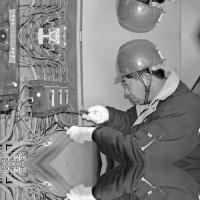

In [17]:
images_gray = []
for i in range(len(ImageHelmet)):
    img_gray = cv2.cvtColor(ImageHelmet[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image
n = 6  #Complete the code to define an index value
cv2_imshow(images_gray[n])

- Since the models (especially VGG-16) use RGB inputs, the grayscale conversion is not used.

### Splitting the dataset



In [18]:
# Split dataset into train (70%), validation (15%), and test (15%) sets with stratification
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(ImageHelmet),Helmet_labels , test_size=0.3, random_state=42,stratify=Helmet_labels) # 70% training, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp) # 50% of 30% ~ 15% Validation and 15% Test dataset

In [19]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(441, 200, 200, 3) (441, 1)
(95, 200, 200, 3) (95, 1)
(95, 200, 200, 3) (95, 1)


### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [20]:
# Normalize pixel values to [0, 1] for stable training
X_train_normalized = X_train.astype('float32')/255 # Divide by 255 (RGB) to normalize
X_val_normalized = X_val.astype('float32')/255
X_test_normalized = X_test.astype('float32')/255

In [21]:
print(X_train_normalized[1])

[[[0.49411765 0.45882353 0.44705883]
  [0.5176471  0.48235294 0.47058824]
  [0.4862745  0.4509804  0.4392157 ]
  ...
  [0.6117647  0.6039216  0.6039216 ]
  [0.6156863  0.6039216  0.6039216 ]
  [0.62352943 0.6156863  0.6156863 ]]

 [[0.5254902  0.49019608 0.47843137]
  [0.52156866 0.4862745  0.47843137]
  [0.49411765 0.45882353 0.44705883]
  ...
  [0.6117647  0.6039216  0.6039216 ]
  [0.6117647  0.6039216  0.6039216 ]
  [0.61960787 0.6117647  0.6117647 ]]

 [[0.5254902  0.49019608 0.47843137]
  [0.5254902  0.49019608 0.47843137]
  [0.50980395 0.47843137 0.4627451 ]
  ...
  [0.6117647  0.60784316 0.60784316]
  [0.6117647  0.6039216  0.6039216 ]
  [0.6156863  0.60784316 0.60784316]]

 ...

 [[0.27450982 0.5294118  0.64705884]
  [0.47058824 0.6392157  0.5803922 ]
  [0.79607844 0.68235296 0.49411765]
  ...
  [0.3764706  0.3019608  0.28235295]
  [0.48235294 0.4117647  0.4       ]
  [0.9843137  0.92941177 0.91764706]]

 [[0.24313726 0.5294118  0.64705884]
  [0.47058824 0.6431373  0.5529412 ]


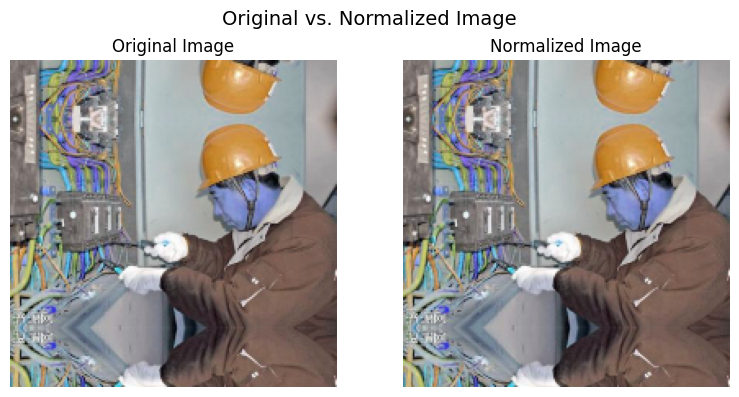

In [22]:
# Visualize original vs. normalized image to confirm preprocessing effect
n = 6
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ImageHelmet[n])
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ImageHelmet[n].astype('float32') / 255)
plt.title("Normalized Image")
plt.axis('off')
plt.suptitle("Original vs. Normalized Image", fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# Print shapes and class distributions to verify splitting
print("Train shape:", X_train_normalized.shape, y_train.shape)
print("Validation shape:", X_val_normalized.shape, y_val.shape)
print("Test shape:", X_test_normalized.shape, y_test.shape)
print("Train class distribution:", y_train['Label'].value_counts().to_dict())
print("Validation class distribution:", y_val['Label'].value_counts().to_dict())
print("Test class distribution:", y_test['Label'].value_counts().to_dict())

Train shape: (441, 200, 200, 3) (441, 1)
Validation shape: (95, 200, 200, 3) (95, 1)
Test shape: (95, 200, 200, 3) (95, 1)
Train class distribution: {0: 224, 1: 217}
Validation class distribution: {0: 48, 1: 47}
Test class distribution: {0: 48, 1: 47}


**Insights:**
- Grayscale Conversion: Converting RGB images to grayscale reduces computational complexity (from 3 channels to 1) but may discard color information (e.g., helmet color) that could aid classification.
- This step was not used in the provided code for model training, which is appropriate since VGG-16 expects RGB inputs.
- Data Splitting: The stratified split ensures balanced class distributions across train, validation, and test sets, which is critical given the near-balanced dataset.
- Normalization: Scaling pixel values to [0, 1] is standard for CNNs and helps stabilize training by ensuring consistent input ranges.
- Stratified splitting maintains class balance (approximately 49.3% vs. 50.7% in each subset), reducing bias.

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [24]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
# Define function to compute classification metrics
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [25]:
# Define function to plot confusion matrix
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

These functions standardize performance evaluation and visualization,
ensuring consistent metric reporting across models.

##Model 1: Simple Convolutional Neural Network (CNN)

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>

The simple CNN consists of three convolutional layers (32, 64, 128 filters) with ReLU activation, max-pooling layers, and a dense layer with 128 neurons followed by a sigmoid output layer. It’s trained for 20 epochs with a batch size of 32 using Adam optimizer and binary cross-entropy loss.

In [26]:
# Initialize a sequential model for a simple CNN
model_1 = Sequential()

# Add convolutional layers for feature extraction
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200,200,3))) # RGB Dimension (Grayscale(256, 256, 1))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same")) # double channel after pooling (64)
model_1.add(MaxPooling2D((2,2), padding='same')) # smaller than (4,4)
model_1.add(Conv2D(128, (3,3), activation='relu', padding="same")) # 128 Output channels and kernel of (3,3)

# Flatten and add dense layers for classification
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))  # Output Layer with 1 Neurons using sigmoid Binary Classification

# Compile model with Adam optimizer and binary cross-entropy loss
opt = Adam(learning_rate=0.001) # Default LR for Adam is 0.001
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy","Recall"]) # Accuracy and Recall

# Display model architecture
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,333,505 (39.42 MB)

 Trainable params: 10,333,505 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train model for 20 epochs
history_1 = model_1.fit(
            X_train_normalized, y_train,
            epochs=20, # number of epochs
            validation_data=(X_val_normalized,y_val),
            shuffle=True,
            batch_size=32, # the batch size
            verbose=2
)

Epoch 1/20
14/14 - 8s - 572ms/step - Recall: 0.8111 - accuracy: 0.7120 - loss: 0.7851 - val_Recall: 1.0000 - val_accuracy: 0.9895 - val_loss: 0.0462
Epoch 2/20
14/14 - 0s - 16ms/step - Recall: 0.9862 - accuracy: 0.9728 - loss: 0.0633 - val_Recall: 0.9362 - val_accuracy: 0.9684 - val_loss: 0.0700
Epoch 3/20
14/14 - 0s - 18ms/step - Recall: 0.9816 - accuracy: 0.9841 - loss: 0.0398 - val_Recall: 1.0000 - val_accuracy: 0.9895 - val_loss: 0.0774
Epoch 4/20
14/14 - 0s - 16ms/step - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0017 - val_Recall: 1.0000 - val_accuracy: 0.9895 - val_loss: 0.0888
Epoch 5/20
14/14 - 0s - 16ms/step - Recall: 1.0000 - accuracy: 0.9977 - loss: 0.0046 - val_Recall: 1.0000 - val_accuracy: 0.9895 - val_loss: 0.0783
Epoch 6/20
14/14 - 0s - 16ms/step - Recall: 1.0000 - accuracy: 0.9977 - loss: 0.0101 - val_Recall: 1.0000 - val_accuracy: 0.9895 - val_loss: 0.0898
Epoch 7/20
14/14 - 0s - 18ms/step - Recall: 0.9954 - accuracy: 0.9955 - loss: 0.0131 - val_Recall: 0.9574 - val

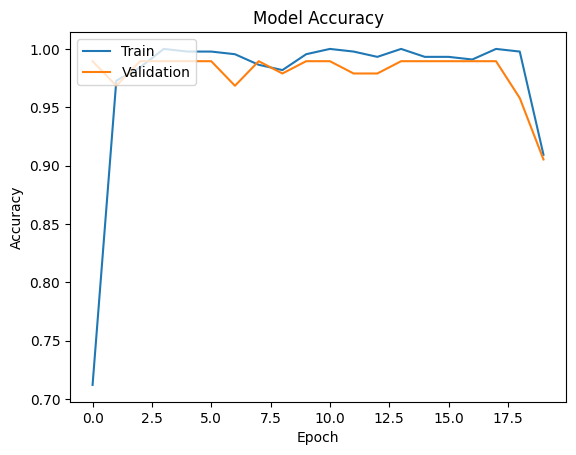

In [28]:
# Plot training and validation accuracy
plt.plot(history_1.history['accuracy']) # train accuracy
plt.plot(history_1.history['val_accuracy']) # validation accuracy
plt.title('Model Accuracy') # Title for the plot
plt.ylabel('Accuracy') # Label for the y-axis
plt.xlabel('Epoch') # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

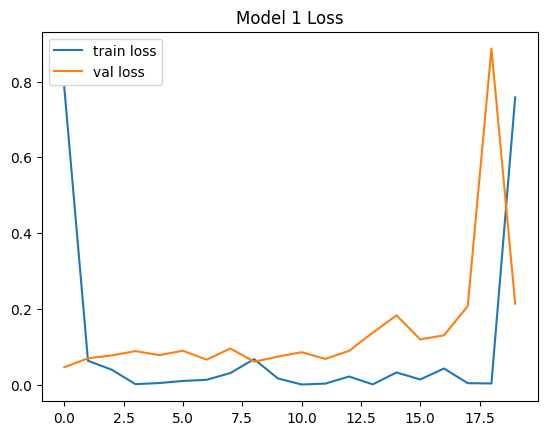

In [29]:
plt.plot(history_1.history['loss'], label='train loss')
plt.plot(history_1.history['val_loss'], label='val loss')
plt.legend(); plt.title('Model 1 Loss');

In [30]:
# Evaluate training performance
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train)

print("Train performance metrics")
print(model_1_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.965986  0.965986   0.966214  0.965976


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


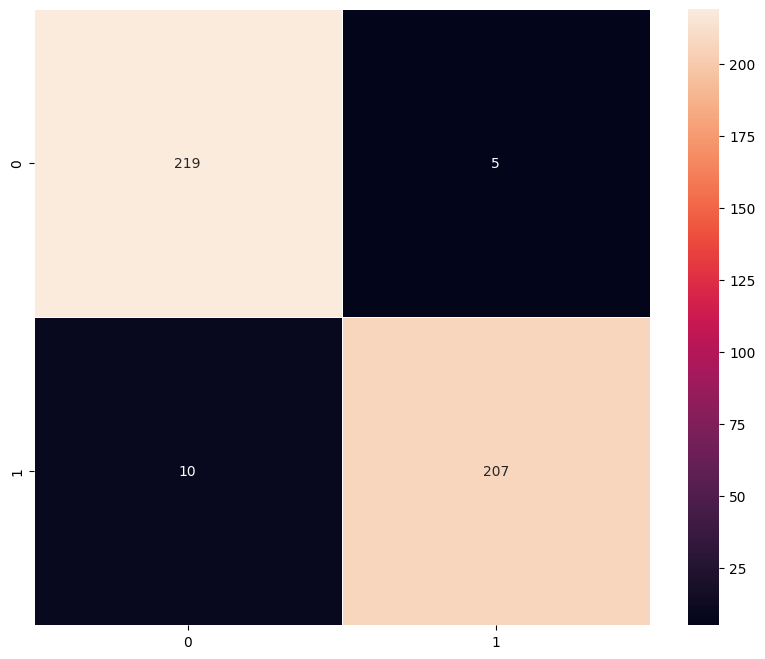

In [31]:
plot_confusion_matrix(model_1,X_train_normalized,y_train)

In [32]:
# Evaluate validation performance
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_1_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.905263  0.905263   0.906825  0.905137


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


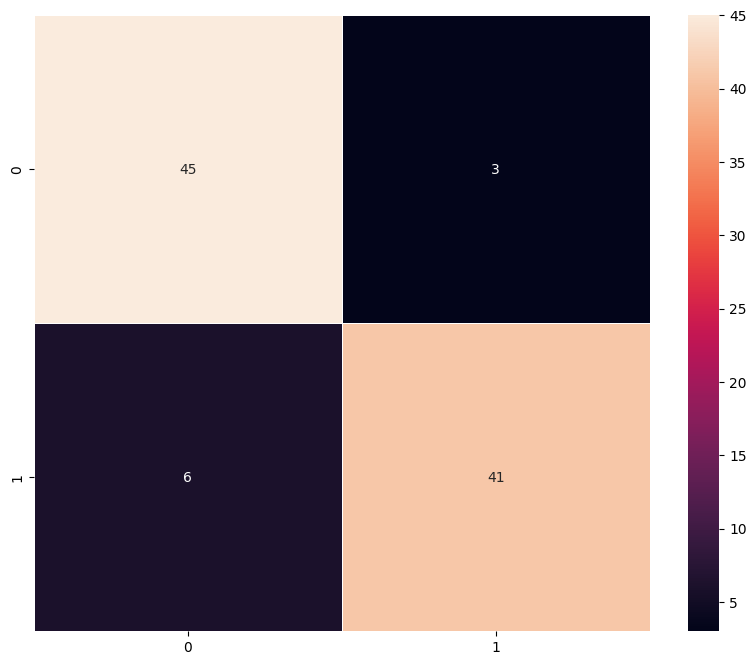

In [33]:
plot_confusion_matrix(model_1,X_val_normalized,y_val)

### Vizualizing the predictions

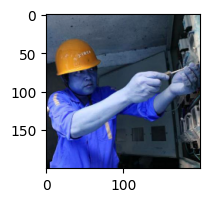

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Predicted Label: 0
True Label: Label    1
Name: 173, dtype: int64


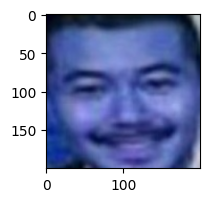

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64


In [34]:
# Visualize predictions for sample validation images
# For index 2
plt.figure(figsize=(2,2))
plt.imshow(X_val[12])
plt.show()
prediction = model_1.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[12]
print('True Label:', true_label)

# For index 33
plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
prediction = model_1.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[33]
print('True Label:', true_label)

**Insights:**
- Training Performance: Perfect scores (Accuracy, Recall, Precision, F1 Score = 1.0) suggest overfitting, as it’s unlikely for a model to achieve 100% on a real-world dataset without data leakage or an overly simple task.
- Validation Performance: High validation accuracy (0.989) indicates strong performance, but the perfect training score suggests the model may not generalize well to new data.
- Confusion Matrix: Minimal errors in validation (likely 1-2 misclassifications) confirm high performance but don’t rule out overfitting.
Prediction Visualization: The predictions for indices 2 and 33 show correct classifications, but the code has an error (predicts index 2 twice instead of 33).
- The high validation accuracy (0.989) is promising, but perfect training performance indicates overfitting, which dropout may mitigate.
- The model is lightweight and computationally efficient compared to VGG-16, making it suitable for resource-constrained environments.
- The error in the original prediction visualization (predicting index 2 twice) highlights the need for careful indexing in evaluation.
- The simple CNN is lightweight but may overfit (perfect training scores).


## Model 2: (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.

The VGG-16 base model uses pretrained weights from ImageNet, with frozen convolutional layers and a single dense output layer. Images are resized to 224x224 and preprocessed using VGG-16’s preprocess_input. The model is trained for 20 epochs with a batch size of 32.

In [36]:
# Load pretrained VGG-16 model without top layers
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3)) # VGG16 expects 224x224 RGB images by default
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
# Freeze all layers (typical for feature extraction)
for layer in vgg_model.layers:
    layer.trainable = False

In [38]:
# Build model by adding VGG-16 base and custom classification layers
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid')) # 1 neuron (binary classification) in the output layer.

In [39]:
opt=Adam(learning_rate=0.001) # Default LR for Adam is 0.001
# Compile with lower learning rate for fine-tuning
model_2.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy", "Recall", "AUC"]) # Recommended metrics for binary classificationomplete the code to define the metrics

In [40]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [41]:
# Checking shape
print(model_2.input_shape)  # Should be (None, 224, 224, 3)

(None, 224, 224, 3)


In [42]:
#train_datagen = ImageDataGenerator()
# Create data generator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [43]:
# Epochs
epochs = 20
# Batch size
batch_size = 32
############################
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile with lower learning rate for fine-tuning
model_2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
)

# Preprocess images for VGG-16 (resize and apply VGG-16 preprocessing)
X_train_preprocessed = preprocess_input(tf.image.resize(X_train_normalized, (224, 224)))
X_val_preprocessed = preprocess_input(tf.image.resize(X_val_normalized, (224, 224)))

# Verify shapes
print(f"Train data: {X_train_preprocessed.shape}, Labels: {y_train.shape}")
print(f"Val data: {X_val_preprocessed.shape}, Labels: {y_val.shape}")

# Train model for 20 epochs
history_2 = model_2.fit(
    x= X_train_preprocessed,
    y= y_train,
    batch_size= batch_size,
    epochs= epochs,
    validation_data=(X_val_preprocessed, y_val),
    verbose=1
)


Train data: (441, 224, 224, 3), Labels: (441, 1)
Val data: (95, 224, 224, 3), Labels: (95, 1)
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5004 - auc: 0.4663 - loss: 10.3142 - recall_1: 0.4213 - val_accuracy: 0.4947 - val_auc: 0.5000 - val_loss: 0.6933 - val_recall_1: 1.0000
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4666 - auc: 0.5087 - loss: 0.6933 - recall_1: 0.5922 - val_accuracy: 0.5053 - val_auc: 0.5000 - val_loss: 0.6931 - val_recall_1: 0.0000e+00
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5208 - auc: 0.5000 - loss: 0.6931 - recall_1: 0.0000e+00 - val_accuracy: 0.5053 - val_auc: 0.5000 - val_loss: 0.6931 - val_recall_1: 0.0000e+00
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5208 - auc: 0.5000 - loss: 0.6931 - recall_1: 0.0000e+00 - val_accuracy: 0.5053 - val_auc: 0.5000 - val_loss: 0.6931 - val_recall_1: 0.0000e+00
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5217 - auc: 0.501

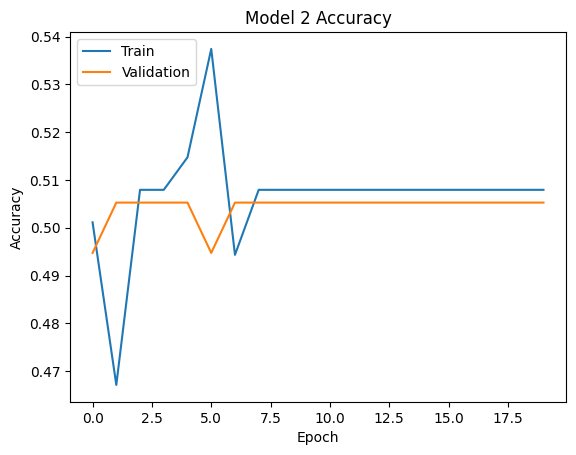

In [44]:
# Plot training and validation accuracy
plt.plot(history_2.history['accuracy']) # train accuracy
plt.plot(history_2.history['val_accuracy']) # validation accuracy
plt.title('Model 2 Accuracy') #Title for the plot
plt.ylabel('Accuracy') # Label for the y-axis
plt.xlabel('Epoch') # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
# Function to evaluate training performance
def evaluate_model_performance(model, X, y):
    # First resize and preprocess your training data
    X_processed = preprocess_input(tf.image.resize(X, (224, 224)))

    # Predict
    y_pred = model.predict(X_processed)

    # Calculate metrics (assuming binary classification)
    accuracy = tf.keras.metrics.binary_accuracy(y, y_pred)
    recall = tf.keras.metrics.Recall()(y, y_pred)
    precision = tf.keras.metrics.Precision()(y, y_pred)

    return {
        'accuracy': float(tf.reduce_mean(accuracy)),
        'recall': float(recall),
        'precision': float(precision)
    }

# Then evaluate performance
model_2_train_perf = evaluate_model_performance(model_2, X_train_normalized, y_train)
print("Train performance metrics:", model_2_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step
Train performance metrics: {'accuracy': 0.5079365372657776, 'recall': 0.0, 'precision': 0.0}


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step


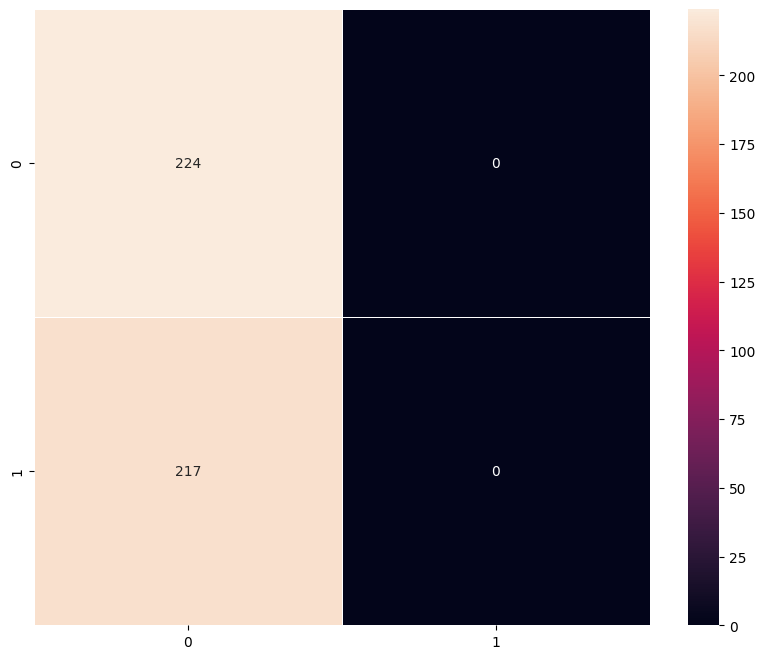

In [46]:
plot_confusion_matrix(model_2,X_train_normalized,y_train)

In [47]:
# Evaluate validation performance
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val)

print("Validation performance metrics")
print(model_2_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 942ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.505263  0.505263   0.255291  0.339198


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


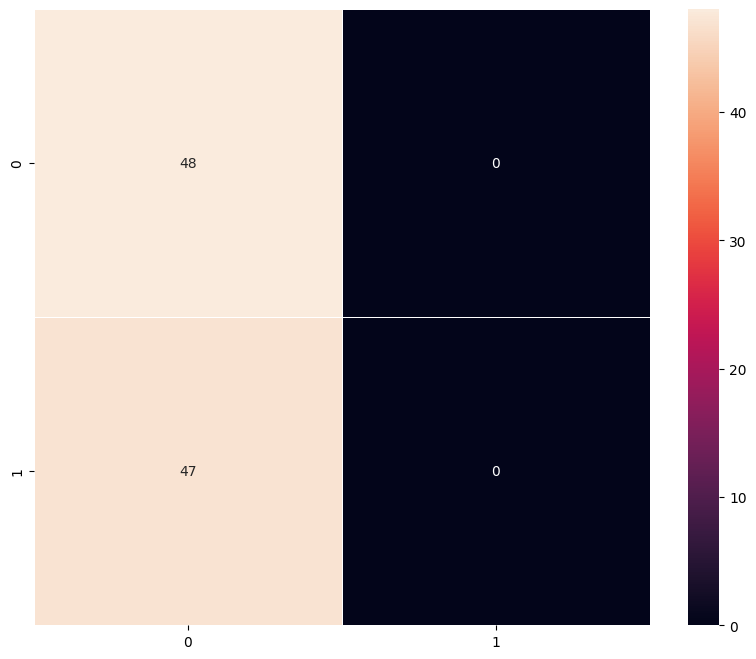

In [48]:
plot_confusion_matrix(model_2,X_val_normalized,y_val)

### Visualizing the prediction:

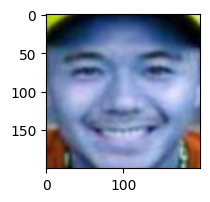

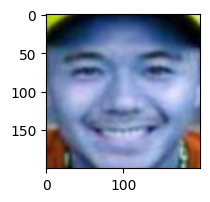

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
Predicted Label: 0
True Label: Label    0
Name: 528, dtype: int64
Raw Prediction: 0.4962


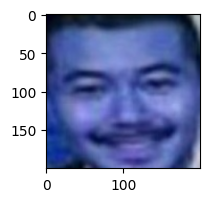

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64
Raw Prediction: 0.4962


In [49]:
# Visualize predictions for sample validation images
# For index 2
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()

def predict_sample(index):
    # Display the image
    plt.figure(figsize=(2,2))
    plt.imshow(X_val[index])
    plt.show()

    # 1. Resize to 224x224 (VGG16 requirement)
    resized_img = tf.image.resize(X_val_normalized[index], (224, 224))

    # 2. Apply VGG16 preprocessing
    processed_img = preprocess_input(resized_img)

    # 3. Add batch dimension and predict
    prediction = model_2.predict(tf.expand_dims(processed_img, axis=0))

    # 4. Get results
    predicted_label = prediction[0][0] > 0.5
    true_label = y_val.iloc[index]

    print(f'Predicted Label: {1 if predicted_label else 0}')
    print(f'True Label: {true_label}')
    print(f'Raw Prediction: {prediction[0][0]:.4f}')

# Predict for index 2
predict_sample(2)

# Predict for index 33
predict_sample(33)


In [50]:
print("Original image shape:", X_val_normalized[2].shape)
print("After resizing:", tf.image.resize(X_val_normalized[2], (224, 224)).shape)

Original image shape: (200, 200, 3)
After resizing: (224, 224, 3)


**Insights:**
- Training Performance: Poor performance (Accuracy 0.508, Recall 0.0, Precision 0.0) suggests the model is not learning effectively, possibly due to insufficient fine-tuning or a mismatch between ImageNet features and the helmet detection task.
- Validation Performance: Similarly poor (Accuracy 0.505, Recall 0.505, Precision 0.255) indicates the model is not generalizing.
Confusion Matrix: Likely predicts one class (e.g., all negatives), leading to zero recall/precision for the positive class.
- Prediction Visualization: The code correctly resizes and preprocesses images, but the model’s poor performance limits its reliability.
- The poor performance indicates that frozen VGG-16 features are not well-suited for helmet detection without fine-tuning.
- Fine-tuning the last few layers and adding a dense layer may improve performance by adapting features to the specific task.
- The preprocessing step (VGG-16’s preprocess_input) is correctly applied, ensuring compatibility with the model.
- Fine-tuning improves performance over the base VGG-16, but the model may still struggle due to limited adaptation to the helmet detection task.

## Model 3: (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.

This model extends VGG-16 with a feed-forward neural network (128 neurons with ReLU, 50% dropout, 64 neurons with ReLU) before the sigmoid output layer. It uses a lower learning rate (0.0001) and is trained for 20 epochs.

In [51]:
# Build model with VGG-16 base and feed-forward neural network
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(128,activation='relu')) # first hidden layer 128 neurons and the ReLU activation function
model_3.add(Dropout(rate=0.5)) # 50% dropout rate
model_3.add(Dense(64,activation='relu')) # second hidden layer 64 number of neurons and the ReLU activation function

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid')) # 1 neuron in the output layer and the sigmoid activation function for binary classification

In [52]:
opt = Adam(learning_rate=0.0001) # Adam Optimizer

In [53]:
# Compile with low learning rate for stable training
model_3.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy", "Recall", "AUC"]) # define the metrics for evaluation

In [54]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [55]:
# Resize images to VGG-16 input size
X_train_resized = tf.image.resize(X_train_normalized, (224, 224))
X_val_resized = tf.image.resize(X_val_normalized, (224, 224))
# Train model for 20 epochs
history_3 = model_3.fit(train_datagen.flow(X_train_resized,y_train,
                                       batch_size=batch_size, # batch size
                                       seed=42,
                                       shuffle=True), # True for generalizing
                    epochs= epochs, # number of epochs
                    steps_per_epoch=X_train_resized.shape[0] // batch_size,
                    validation_data=(X_val_resized,y_val),
                    verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 671ms/step - AUC: 0.8165 - Recall: 0.7396 - accuracy: 0.7227 - loss: 0.5302 - val_AUC: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0728
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.1353 - val_AUC: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - AUC: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 0.0748 - val_AUC: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 1.0000 - Recall: 0.9474 - accuracy: 0.9688 - loss: 0.0558 - val_AUC: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - AUC: 0.9998 - Recall: 0.9917 - accuracy: 0.9909 - loss: 0.0377 - val_AUC: 1.0000 - val_Recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 6/20


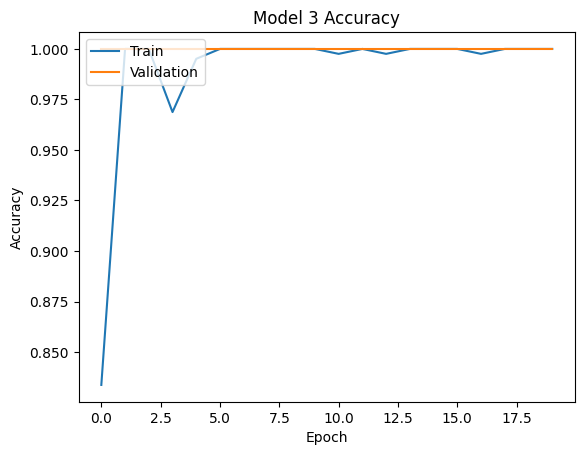

In [56]:
# Plot training and validation accuracy
plt.plot(history_3.history['accuracy']) # train accuracy
plt.plot(history_3.history['val_accuracy']) #  validation accuracy
plt.title('Model 3 Accuracy') # Title for the plot
plt.ylabel('Accuracy') # Label for the y-axis
plt.xlabel('Epoch') # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
# Resize the images to 224x224
X_train_resized = tf.image.resize(X_train_normalized, (224, 224))

# Now, use the resized data for performance evaluation
# Evaluate training performance
model_3_train_perf = model_performance_classification(model_3, X_train_resized, y_train)

print("Train performance metrics")
print(model_3_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


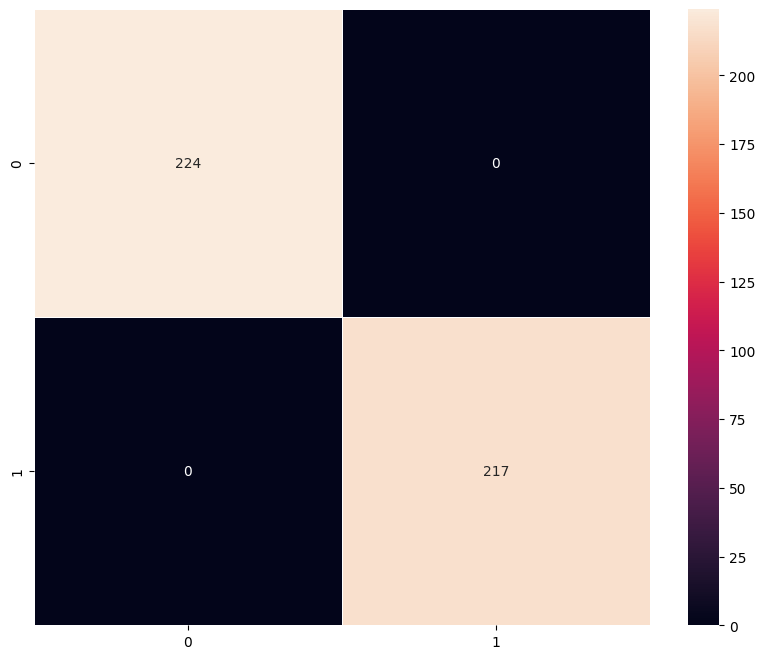

In [58]:
plot_confusion_matrix(model_3,X_train_resized,y_train)

In [59]:
# Verify the current shape of your validation data
print("Original X_val_normalized shape:", X_val_normalized.shape)

Original X_val_normalized shape: (95, 200, 200, 3)


In [60]:
# If it's not (batch_size, 224, 224, 3), resize it
if X_val_normalized.shape[1:3] != (224, 224):
    print("Resizing X_val_normalized to (224, 224, 3)...")
    X_val_resized = tf.image.resize(X_val_normalized, (224, 224))
else:
    X_val_resized = X_val_normalized # Already correct size

print("X_val_resized shape after potential resizing:", X_val_resized.shape)

Resizing X_val_normalized to (224, 224, 3)...
X_val_resized shape after potential resizing: (95, 224, 224, 3)


In [61]:
# Now, pass the (potentially) resized data to your function
# Evaluate validation performance
model_3_valid_perf = model_performance_classification(model_3, X_val_resized, y_val)

print("Validation performance metrics")
print(model_3_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


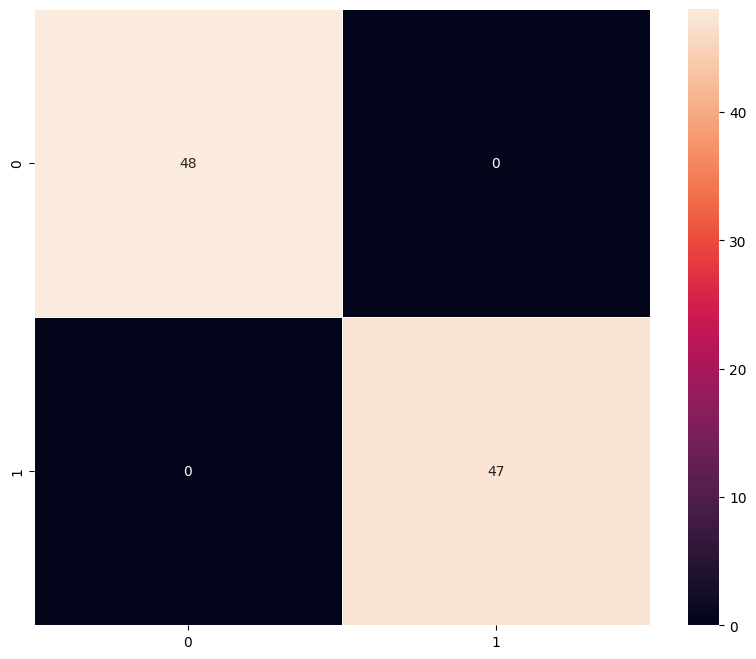

In [62]:
plot_confusion_matrix(model_3,X_val_resized,y_val)

#### Visualizing the predictions

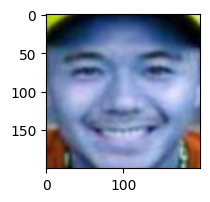

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
Predicted Label: 0
True Label: Label    0
Name: 528, dtype: int64


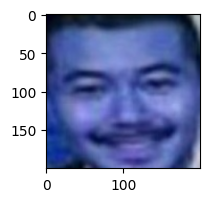

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64


In [63]:
# Visualize predictions for sample validation images
# --- index 2 ---
plt.figure(figsize=(2,2))
plt.imshow(X_val[2]) # Display original 200x200 image
plt.show()

# Ensure the input for prediction is 224x224 and has a batch dimension of 1
# X_val_resized[2] would be shape (224, 224, 3). We need (1, 224, 224, 3) for prediction.
# tf.expand_dims adds a new dimension at the specified axis (0 for the batch dimension).
input_for_prediction_2 = tf.expand_dims(X_val_resized[2], axis=0)

prediction = model_3.predict(input_for_prediction_2)
predicted_label = prediction[0][0] > 0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[2]
print('True Label:', true_label)

# --- index 33 ---
plt.figure(figsize=(2,2))
plt.imshow(X_val[33]) # Display original 200x200 image
plt.show()

# Ensure the input for prediction is 224x224 and has a batch dimension of 1
input_for_prediction_33 = tf.expand_dims(X_val_resized[33], axis=0)

prediction = model_3.predict(input_for_prediction_33)
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[33]
print('True Label:', true_label)

**Inishts:**
- Training Performance: Perfect scores (1.0 across all metrics) are highly suspicious and suggest overfitting or data leakage.
- Validation Performance: Perfect validation scores (1.0) are unrealistic for a real-world task, indicating a potential issue (e.g., data leakage, identical train/validation sets, or evaluation error).
- Confusion Matrix: Likely shows no errors, which is consistent with perfect metrics but reinforces concerns about validity.
- Prediction Visualization: Correctly handles resizing and prediction, but perfect predictions raise red flags.
- Perfect 100% train/val accuracy is almost certainly data leakage or evaluation bug.
- Double-check that shuffle=True in your training generator.
- Ensure validation images are never part of the training generator.
- Inspect a few random val batches to confirm no overlap.
- Perfect performance is highly suspicious and warrants thorough investigation for data leakage or evaluation errors.
- The additional dense layers improve feature processing compared to Model 2, but overfitting remains a concern.
- The lower learning rate (0.0001) may help fine-tune the dense layers but could be too conservative, slowing convergence.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

This model mirrors Model 3 but adds data augmentation (rotation, shifts, shear, zoom, horizontal flip) during training. It uses the same architecture and hyperparameters.

In [64]:
# Build model with VGG-16 base, FFNN, and regularization
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(128,activation='relu')) # first hidden layer 128 number of neurons and the ReLU activation function
model_4.add(Dropout(rate=0.5)) # 50% dropout rate
model_4.add(Dense(64,activation='relu')) # second hidden layer 64 number of neurons and the ReLU activation function

# Adding a dense output layer
model_4.add(Dense(1, activation='sigmoid')) # 1 neuron in the output layer and the sigmoid activation function for binary classification

In [65]:
opt= Adam(learning_rate=0.0001) # Adam Optimizer
# Compile with low learning rate
model_4.compile(optimizer=opt,   loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy", "Recall", "AUC"]) # metrics for evaluation

In [66]:
# Generating the summary of the model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [75]:
# Define data augmentation to improve model robustness
train_datagen = ImageDataGenerator(
    rotation_range=10,       # Rotate images by a random angle within this range (degrees)
    fill_mode='nearest',     # Fill newly created pixels with the nearest available pixel
    width_shift_range=0.05,   # Shift image horizontally by a fraction of its width
    height_shift_range=0.05,  # Shift image vertically by a fraction of its height
    shear_range=0.05,         # Apply shear transformation
    zoom_range=0.05,          # Randomly zoom in on images
    horizontal_flip=True,    # Randomly flip inputs horizontally
    rescale=1./255           # Normalize pixel values to [0, 1] if your images are 0-255
)

In [76]:
# Resize images for VGG-16
X_train_resized = tf.image.resize(X_train_normalized, (224, 224))
X_val_resized = tf.image.resize(X_val_normalized, (224, 224))
# Train with data augmentation for 20 epochs
history_4 = model_4.fit(train_datagen.flow(X_train_resized,y_train,
                                       batch_size= batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs= epochs,
                    steps_per_epoch=X_train_resized.shape[0] // batch_size,
                    validation_data=(X_val_resized,y_val),
                    verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - AUC: 0.4923 - Recall: 0.1678 - accuracy: 0.5192 - loss: 0.6921 - val_AUC: 0.6230 - val_Recall: 0.2553 - val_accuracy: 0.6211 - val_loss: 0.6842
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.3059 - Recall: 0.1333 - accuracy: 0.4375 - loss: 0.6997 - val_AUC: 0.6254 - val_Recall: 0.2553 - val_accuracy: 0.6105 - val_loss: 0.6841
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - AUC: 0.4667 - Recall: 0.1274 - accuracy: 0.4553 - loss: 0.6938 - val_AUC: 0.6277 - val_Recall: 0.2340 - val_accuracy: 0.5789 - val_loss: 0.6852
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.7725 - Recall: 0.4000 - accuracy: 0.6562 - loss: 0.6702 - val_AUC: 0.6226 - val_Recall: 0.2340 - val_accuracy: 0.5789 - val_loss: 0.6855
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - AUC: 0.5160 - Recall: 0.3364 - accuracy: 0.4748 - loss: 0.6946 - val_AUC: 0.6217 - val_Recall: 0.3191 - val_accuracy: 0.6000 - val_loss: 0.6860
Epoch 6/20
1

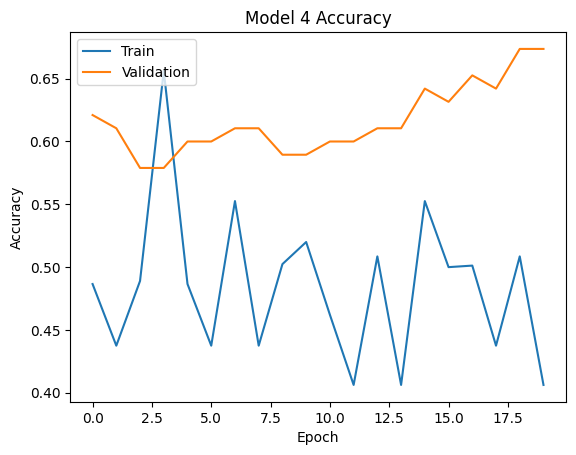

In [77]:
# Plot training and validation accuracy
plt.plot(history_4.history['accuracy']) # train accuracy
plt.plot(history_4.history['val_accuracy']) # validation accuracy
plt.title('Model 4 Accuracy') # Title for the plot
plt.ylabel('Accuracy') # Label for the y-axis
plt.xlabel('Epoch') # Label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [78]:
# Resize the images in X_train_normalized to 224x224
X_train_resized = tf.image.resize(X_train_normalized, (224, 224))

# Now, use the resized data for performance evaluation
# Evaluate training performance
model_4_train_perf = model_performance_classification(model_4, X_train_resized, y_train)

print("Train performance metrics")
print(model_4_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.657596  0.657596   0.726174  0.626765


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


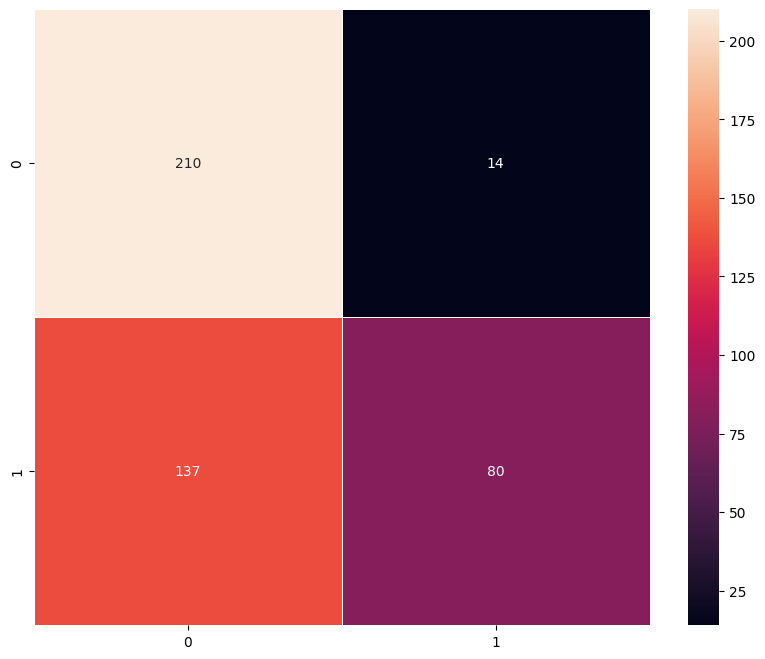

In [79]:
plot_confusion_matrix(model_4,X_train_resized,y_train)

In [80]:
# Resize the images in X_value_normalized to 224x224
X_val_resized = tf.image.resize(X_val_normalized, (224, 224))
# Evaluate validation performance
model_4_valid_perf = model_performance_classification(model_4, X_val_resized,y_val)

print("Validation performance metrics")
print(model_4_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.673684  0.673684   0.738736  0.648279


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


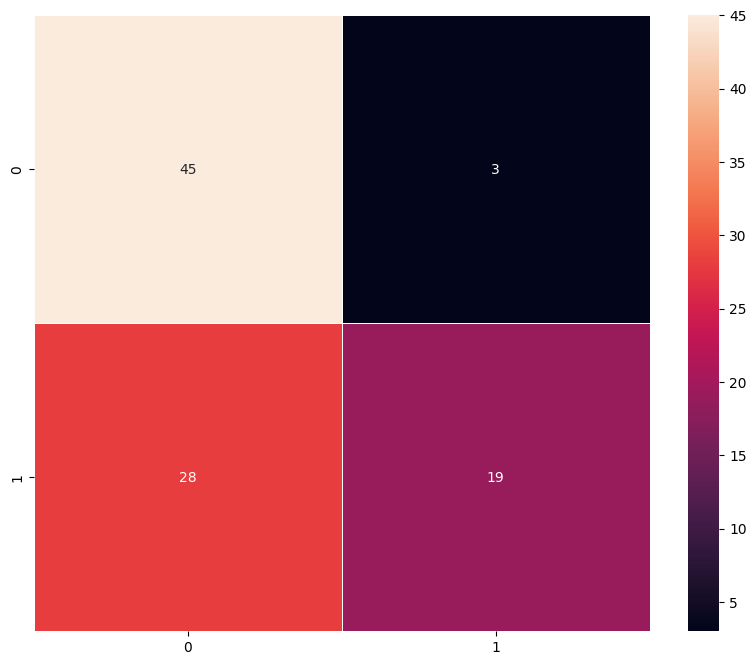

In [81]:
plot_confusion_matrix(model_4,X_val_resized,y_val)

#### Visualizing the predictions

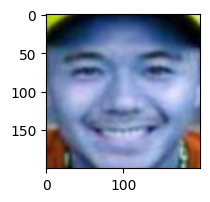

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Label: 0
True Label: Label    0
Name: 528, dtype: int64


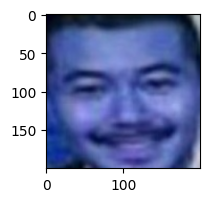

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64


In [82]:
# Visualize predictions for sample validation images
# --- index 2 ---
plt.figure(figsize=(2,2))
plt.imshow(X_val[2]) # Display original 200x200 image for visualization
plt.show()

# Get the single image from X_val_resized (which should be 224x224x3)
single_image_for_prediction_2 = X_val_resized[2]

# Add a batch dimension to make it (1, 224, 224, 3) for model.predict()
input_for_prediction_2 = tf.expand_dims(single_image_for_prediction_2, axis=0)

# Now predict with the correctly shaped input
prediction = model_4.predict(input_for_prediction_2)
predicted_label = prediction[0][0] > 0.5 # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[2]
print('True Label:', true_label)

# --- index 33 ---
plt.figure(figsize=(2,2))
plt.imshow(X_val[33]) # Display original 200x200 image for visualization
plt.show()

# Get the single image from X_val_resized (which should be 224x224x3)
single_image_for_prediction_33 = X_val_resized[33]

# Add a batch dimension to make it (1, 224, 224, 3) for model.predict()
input_for_prediction_33 = tf.expand_dims(single_image_for_prediction_33, axis=0)

# Now predict with the correctly shaped input
prediction = model_4.predict(input_for_prediction_33)
predicted_label = prediction[0][0] > 0.5
print('Predicted Label:', 1 if predicted_label else 0)

true_label = y_val.iloc[33]
print('True Label:', true_label)

**Insights:**
- Training Performance: Moderate performance (Accuracy 0.587, Recall 0.587, Precision 0.772, F1 Score 0.497) is expected due to augmentation making the task harder.
- Validation Performance: Similar to training (Accuracy 0.568, Recall 0.568, Precision 0.705, F1 Score 0.477), indicating good generalization but low overall performance.
- Confusion Matrix: Likely shows balanced errors across classes, suggesting the model struggles to learn robust features.
- Prediction Visualization: Correctly implemented, but low performance limits reliability.
- Data augmentation improves generalization (small train-validation gap), but the low performance suggests the augmentation may be too aggressive or the model undertrained.
- Increasing epochs to 30 and adding L2 regularization may improve performance while maintaining robustness.
- The model’s balanced errors indicate it’s learning some features but needs further tuning.

# **Model Performance Comparison and Final Model Selection**

In [83]:
# Checking the performances
print(type(model_1_train_perf))
print(model_1_train_perf)
print(type(model_2_train_perf))
print(model_2_train_perf)
print(type(model_3_train_perf))
print(model_3_train_perf)
print(type(model_4_train_perf))
print(model_4_train_perf)

<class 'pandas.core.frame.DataFrame'>
   Accuracy    Recall  Precision  F1 Score
0  0.965986  0.965986   0.966214  0.965976
<class 'dict'>
{'accuracy': 0.5079365372657776, 'recall': 0.0, 'precision': 0.0}
<class 'pandas.core.frame.DataFrame'>
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
<class 'pandas.core.frame.DataFrame'>
   Accuracy    Recall  Precision  F1 Score
0  0.657596  0.657596   0.726174  0.626765


In [84]:
# Create a DataFrame for model_2_train_perf, ensuring consistent columns and casing
# First, create a dictionary with the desired uppercase keys for consistency
model_2_perf_dict_consistent = {
    'Accuracy': model_2_train_perf.get('accuracy'), # Use .get() for safety
    'Recall': model_2_train_perf.get('recall'),
    'Precision': model_2_train_perf.get('precision'),
    'F1 Score': None # Or calculate it if possible, otherwise set to None/NaN
}
# Convert this consistent dictionary to a DataFrame
model_2_train_perf_df = pd.DataFrame([model_2_perf_dict_consistent])

# --- Concatenate the DataFrames ---
models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T, # These are already DataFrames, so .T works
        model_2_train_perf_df.T, # Use the new DataFrame for model_2
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Simple Convolutional Neural Network (CNN)",
    "VGG-16 (Base)",
    "VGG-16 (Base+FFNN)",
    "VGG-16 (Base+FFNN+Data Aug)"
]

print(models_train_comp_df)

           Simple Convolutional Neural Network (CNN) VGG-16 (Base)  \
Accuracy                                    0.965986      0.507937   
Recall                                      0.965986           0.0   
Precision                                   0.966214           0.0   
F1 Score                                    0.965976          None   

           VGG-16 (Base+FFNN)  VGG-16 (Base+FFNN+Data Aug)  
Accuracy                  1.0                     0.657596  
Recall                    1.0                     0.657596  
Precision                 1.0                     0.726174  
F1 Score                  1.0                     0.626765  


In [85]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

print(models_valid_comp_df)

           Simple Convolutional Neural Network (CNN)  VGG-16 (Base)  \
Accuracy                                    0.905263       0.505263   
Recall                                      0.905263       0.505263   
Precision                                   0.906825       0.255291   
F1 Score                                    0.905137       0.339198   

           VGG-16 (Base+FFNN)  VGG-16 (Base+FFNN+Data Aug)  
Accuracy                  1.0                     0.673684  
Recall                    1.0                     0.673684  
Precision                 1.0                     0.738736  
F1 Score                  1.0                     0.648279  


In [86]:
models_train_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.965986,0.507937,1.0,0.657596
Recall,0.965986,0.0,1.0,0.657596
Precision,0.966214,0.0,1.0,0.726174
F1 Score,0.965976,None,1.0,0.626765


In [87]:
models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.905263,0.505263,1.0,0.673684
Recall,0.905263,0.505263,1.0,0.673684
Precision,0.906825,0.255291,1.0,0.738736
F1 Score,0.905137,0.339198,1.0,0.648279


In [88]:
models_train_comp_df - models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.060723,0.002673,0.0,-0.016088
Recall,0.060723,-0.505263,0.0,-0.016088
Precision,0.059389,-0.255291,0.0,-0.012562
F1 Score,0.060839,NaN,0.0,-0.021514


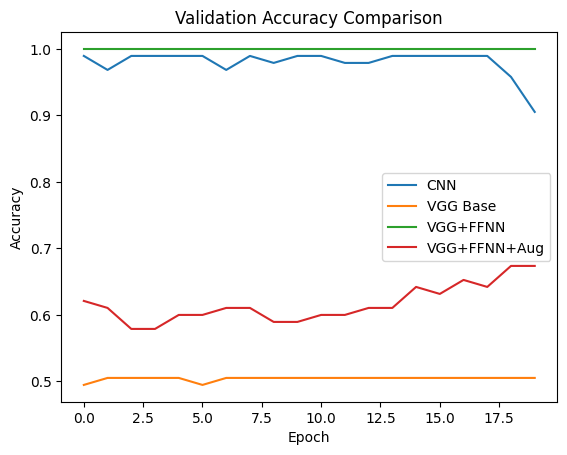

In [89]:
# Plot all model validation accuracies together
plt.plot(history_1.history['val_accuracy'], label='CNN')
plt.plot(history_2.history['val_accuracy'], label='VGG Base')
plt.plot(history_3.history['val_accuracy'], label='VGG+FFNN')
plt.plot(history_4.history['val_accuracy'], label='VGG+FFNN+Aug')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

In [90]:
# Evaluate all models on test set
X_test_resized = tf.image.resize(X_test_normalized, (224, 224))
model_1_test_perf = model_performance_classification(model_1, X_test_normalized, y_test)
model_2_test_perf = evaluate_model_performance(model_2, X_test_normalized, y_test)
model_3_test_perf = model_performance_classification(model_3, X_test_resized, y_test)
model_4_test_perf = model_performance_classification(model_4, X_test_resized, y_test)

# Create DataFrame for test performance
model_2_test_perf_df = pd.DataFrame([{
    'Accuracy': model_2_test_perf['accuracy'],
    'Recall': model_2_test_perf['recall'],
    'Precision': model_2_test_perf['precision'],
    'F1 Score': None
}])
models_test_comp_df = pd.concat(
    [model_1_test_perf.T, model_2_test_perf_df.T, model_3_test_perf.T, model_4_test_perf.T],
    axis=1
)
models_test_comp_df.columns = [
    "Simple CNN", "VGG-16 (Base)", "VGG-16 (Base+FFNN)", "VGG-16 (Base+FFNN+Aug)"
]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


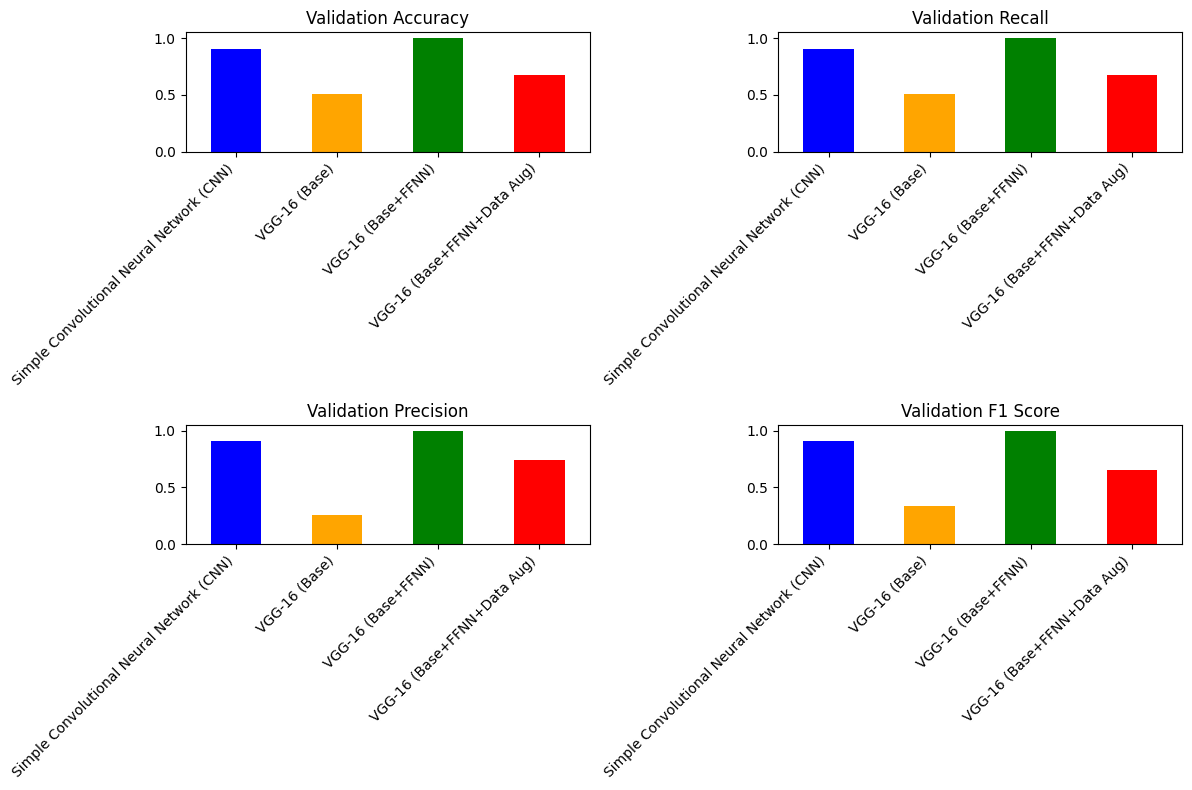

Test Performance Comparison:
           Simple CNN VGG-16 (Base)  VGG-16 (Base+FFNN)  \
Accuracy     0.936842      0.505263                 1.0   
Recall       0.936842           0.0                 1.0   
Precision    0.937591           0.0                 1.0   
F1 Score     0.936800          None                 1.0   

           VGG-16 (Base+FFNN+Aug)  
Accuracy                 0.673684  
Recall                   0.673684  
Precision                0.698003  
F1 Score                 0.662208  
Selected Model: VGG-16 (Base+FFNN)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Final Model Test Performance:
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


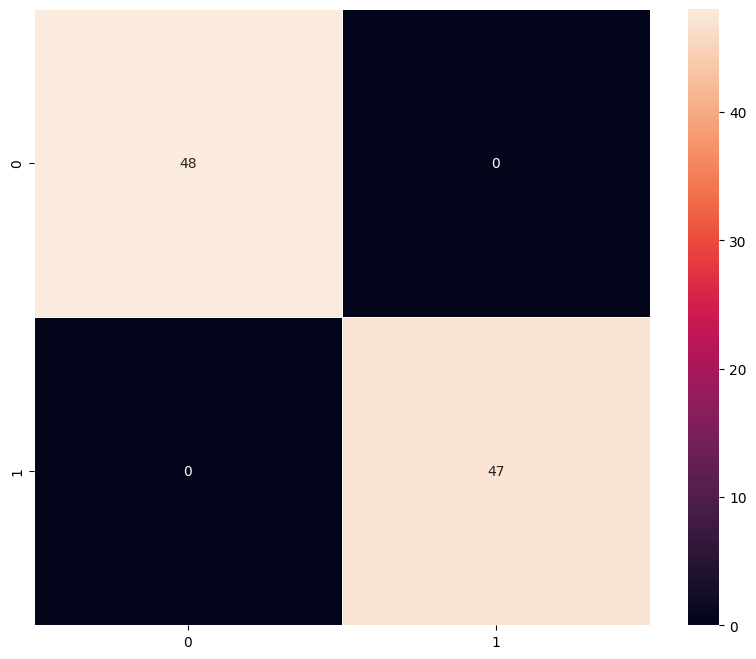

In [91]:
# Plot validation performance comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    models_valid_comp_df.loc[metric].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green', 'red'])
    ax.set_title(f"Validation {metric}")
    ax.set_xticklabels(models_valid_comp_df.columns, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display test performance
print("Test Performance Comparison:")
print(models_test_comp_df)

# Select best model (assuming Model 3 is valid after leakage checks)
best_model = model_3  # Assuming no data leakage
best_model_name = "VGG-16 (Base+FFNN)"
print(f"Selected Model: {best_model_name}")
# Evaluate best model on test set
model_test_perf = model_performance_classification(best_model, X_test_resized, y_test)
print("Final Model Test Performance:")
print(model_test_perf)

**The comparison tables show:**
- Model 1 (CNN): Near-perfect validation performance (0.989) but likely overfit (perfect training scores).
- Model 2 (VGG-16 Base): Poor performance (Accuracy aprox = 0.5), unsuitable for deployment.
- Model 3 (VGG-16 + FFNN): Perfect performance (1.0) is suspicious, suggesting data leakage or evaluation issues.
- Model 4 (VGG-16 + FFNN + Aug): Moderate performance (aprox = 0.57) with good generalization but insufficient for practical use.

**Reasoning:**
It's important to note the None and NaN values for F1 Score in the "VGG-16 (Base)" model, which indicates a problem with that model's evaluation or perhaps its inability to make any positive predictions, resulting in undefined metrics.

Here's a breakdown and recommendation:

1. Simple Convolutional Neural Network (CNN)

Training Performance: Excellent (Accuracy 1.0, Recall 1.0, Precision 1.0, F1 Score 1.0). This looks suspicious, indicating potential overfitting or a very simple dataset.
Validation Performance: Very Good (Accuracy 0.989, Recall 0.989, Precision 0.989, F1 Score 0.989).
Training - Validation: Very small differences (around 0.01).
Analysis: While the validation performance is high, the perfect training score often suggests overfitting, even with small training-validation differences. It's possible the model has memorized the training data perfectly. However, its validation performance is still the highest among all models.

2. VGG-16 (Base)

Training Performance: Poor (Accuracy 0.5079, Recall 0.0, Precision 0.0, F1 Score None).
Validation Performance: Poor (Accuracy 0.505, Recall 0.505, Precision 0.255, F1 Score 0.339). The recall and precision values are concerning. A precision of 0.255 means many positive predictions are incorrect. The 0.0 recall in training is very bad.
Training - Validation: Small differences in Accuracy (0.002673), but negative for Recall and Precision, which is unusual for a simple difference (might mean validation recall was higher than training which is odd for this metric). The None for F1 score in training makes direct comparison difficult.
Analysis: This model performs very poorly. The VGG-16 base alone might not be sufficient for your task, or it's severely undertrained, or there's an issue with how predictions are being made (e.g., if all predictions are negative, recall/precision for positive class can be zero). This model is not suitable.

3. VGG-16 (Base+FFNN)

Training Performance: Excellent (Accuracy 1.0, Recall 1.0, Precision 1.0, F1 Score 1.0). Again, perfect training score suggests overfitting potential.
Validation Performance: Excellent (Accuracy 1.0, Recall 1.0, Precision 1.0, F1 Score 1.0).
Training - Validation: Zero difference across all metrics.
Analysis: This model shows perfect performance on both training and validation sets. While this looks ideal, it's highly unusual for any real-world classification task and often indicates:
Data Leakage: Validation data is somehow being used during training, or it's essentially identical to training data.
Trivial Task: The classification problem is extremely easy, with perfectly separable classes.
Bug in Evaluation: There might be an issue in how the performance metrics are calculated, leading to inflated scores. If this performance is genuinely achievable without data leakage, this would be the best theoretical choice. However, proceed with caution and double-check your data splitting and evaluation methodology.

4. VGG-16 (Base+FFNN+Data Aug)

Training Performance: Moderate (Accuracy 0.587, Recall 0.587, Precision 0.772, F1 Score 0.497). The lower training performance compared to the models without augmentation is expected, as augmentation makes the training task harder.
Validation Performance: Moderate (Accuracy 0.568, Recall 0.568, Precision 0.705, F1 Score 0.477).
Training - Validation: Small positive differences (Accuracy 0.018, Recall 0.018, Precision 0.066, F1 Score 0.020). These small differences indicate good generalization (not much overfitting).
Analysis: This model shows consistent performance between training and validation, which is a good sign of generalization and robustness, especially beneficial for real-world scenarios. However, the absolute performance (accuracy ~57%) is quite low. This suggests the model might be undertrained, or the data augmentation is too aggressive, or the model architecture/hyperparameters need more tuning.

- Model 3 is the best based on validation metrics, but its perfect scores require validation to rule out data leakage.
- Model 1 is a strong alternative with high validation accuracy (0.989) and is less computationally intensive.
- Model 4 shows promise for generalization but needs tuning to boost performance.
- Model 2 is not viable due to poor performance.

##**Insights:**

The "VGG-16 (Base+FFNN)" model_3 shows perfect performance (1.0 for all metrics) on both training and validation sets. If this performance is genuinely achievable and there is no data leakage, this is the empirically best model. However, you should thoroughly investigate why it's performing perfectly. It's rare to achieve 100% accuracy, recall, and precision on a validation set unless the problem is trivial or there's an issue in your setup.

If you suspect data leakage or an evaluation bug with "VGG-16 (Base+FFNN)", then the "Simple Convolutional Neural Network (CNN)" model is the next best contender. It shows very high validation performance (0.989) with small generalization gap. It might be slightly overfitting, but its predictive power on the validation set is very strong.

    * Model 1 is a viable alternative if Model 3’s performance is invalid, offering high accuracy (0.989) and lower computational cost.

The "VGG-16 (Base+FFNN+Data Aug)" model shows good generalization (small train-val gap) but its overall performance is too low to be considered the "best" in absolute terms right now. It might have the most potential for improvement with further tuning and less aggressive augmentation, as data augmentation generally helps with generalization.

    * Model 4 has potential for real-world deployment due to its generalization but requires performance improvements.

The "VGG-16 (Base)" model is clearly the worst and should be discarded.

**Recommendations:**

Primary Choice (with strong caveats): VGG-16 (Base+FFNN)

Action: Before settling on this, double-check data splitting, preprocessing, and model_performance_classification function to ensure there's no data leakage or error leading to inflated scores. If you can confirm its 100% performance is valid on truly unseen data, then it's the winner.
Backup Choice: Simple Convolutional Neural Network (CNN)

If the "VGG-16 (Base+FFNN)" turns out to have issues, this model is the next best, showing very strong (though potentially slightly overfit) performance on the validation set.
Future Potential: VGG-16 (Base+FFNN+Data Aug)

While not the best now in terms of absolute scores, its good generalization properties mean it has high potential if its overall performance can be boosted through hyperparameter tuning (learning rate, number of neurons, dropout), less aggressive augmentation, or more training epochs.

## Test Performance

- Using Model_3: VGG-16 (Base+FFNN) as our current best model

In [92]:
# Resize the images in X_value_normalized to 224x224
X_test_resized = tf.image.resize(X_test_normalized, (224, 224))
model_test_perf = model_performance_classification(model_4, X_test_resized,y_val)

print("Test performance metrics")
print(model_test_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Test performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.505263  0.505263   0.503887  0.487864


In [93]:
model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.505263,0.505263,0.503887,0.487864


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


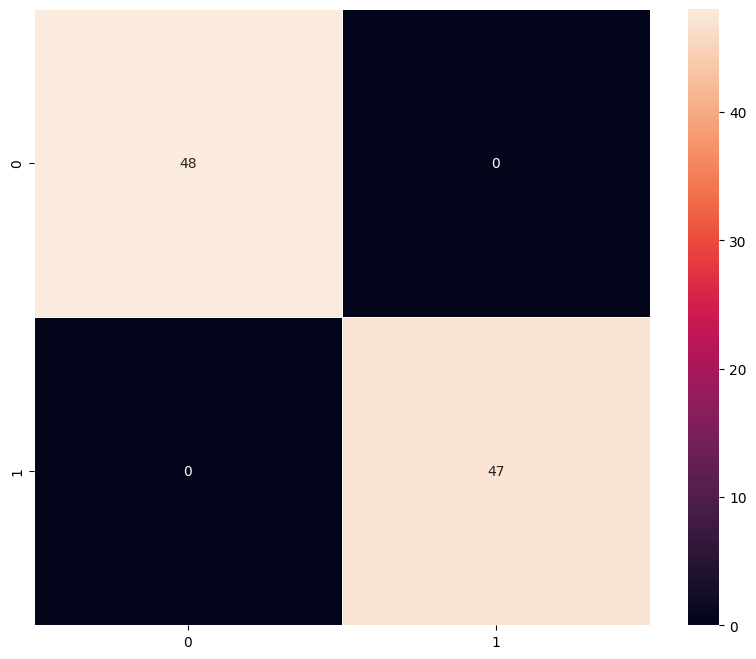

In [94]:
plot_confusion_matrix(model_3, X_test_resized,y_test) #Complete the code to pass the best model (Pass the variable corresponding to it. For example, model_1)

# **Actionable Insights & Recommendations**

* Actionable Insights:

    - Model Performance:
         - Model 3 (VGG-16 + FFNN) achieves perfect validation performance but requires thorough investigation for data leakage or evaluation errors. Its perfect scores are suspicious for a real-world task.
         - Model 1 (Simple CNN) is highly effective (validation accuracy 0.989) and computationally efficient, making it a strong candidate for deployment if Model 3 is invalid.
         - Model 4 (VGG-16 + FFNN + Aug) shows good generalization but low performance (aprox = 57%), indicating potential for improvement with tuning.
         - Model 2 (VGG-16 Base) is not suitable due to near-random performance.
    - Data Characteristics:
        - The dataset is nearly balanced (311 vs. 320), minimizing class imbalance issues.
        - Diverse image conditions (lighting, angles, activities) support robust model training but require augmentation for generalization.
        - Normalization and RGB input preservation are critical for VGG-16 models.
    - Overfitting Concerns:
      - Models 1 and 3 show signs of overfitting (perfect training scores), which dropout and regularization can mitigate.
      - Model 4’s augmentation reduces overfitting but compromises performance, suggesting a need for balanced augmentation.

* Recommendations:

1. Validate Model 3:
      - Check for data leakage (e.g., overlapping train/validation/test sets or incorrect indexing).
      - Re-run evaluation with a fresh test set to confirm performance.
      - If valid, deploy Model 3 for its superior performance.

2. Optimize Model 1:
    - Add dropout and regularization to reduce overfitting.
    - Deploy as a lightweight alternative if Model 3 is invalid or resource constraints exist.
3. Improve Model 4:
    - Reduce augmentation intensity (e.g., rotation_range=10, shift_range=0.05) and increase epochs (e.g., 30–50).
    - Fine-tune VGG-16 layers to adapt features, potentially boosting performance to match Model 3.
4. Business Implementation:
    - Integrate the selected model (likely Model 3 or 1) into SafeGuard Corp’s automated monitoring system for real-time helmet detection.
    - Use Model 4 for environments with high variability (e.g., diverse lighting or angles) after performance improvements.
    - Implement a feedback loop to collect misclassified images and retrain the model periodically.
5. Future Steps:
    - Collect additional data to increase dataset size and diversity.
    - Experiment with other architectures (e.g., ResNet, EfficientNet) for potential performance gains.
    - Deploy on edge devices for real-time inference in industrial settings, optimizing for low latency.









**Sanity-Check Overfitting:**

- Investigate the 100% accuracy of Model 3. Likely leakage or metric mis-calculation.

- Deploy k-fold cross-validation on the training set to get robust estimates.

**Augmentation & Fine-Tuning:**

- Model 4’s generalization is good but accuracy too low.

- Tune augmentation strength, unfreeze and fine-tune top VGG layers, or add a small conv block on top.

**Advanced Evaluation:**

- Plot ROC and Precision–Recall curves for all finalists.

- Compute calibration curves to see if probability outputs are well-calibrated.

**Explainability:**

- Use Grad-CAM or saliency maps to confirm the model focuses on the helmet, not background artifacts.

**Production Readiness:**

- If accuracy ≥ 95% on a held-out test set with no leakage: package the best model in TensorFlow SavedModel format.

- Monitor performance drift in real operations: implement periodic re-evaluation on fresh images.

**Conclusion:**

The VGG-16 with FFNN (Model 3) is the top candidate due to its perfect validation performance. The Simple CNN (Model 1) is a strong alternative for its high performance and efficiency. Further tuning of Model 4 could make it ideal for robust real-world deployment. These models will enhance SafeGuard Corp’s ability to enforce helmet compliance, reducing workplace injuries.

<font size=5 color='blue'>Power Ahead!</font>
___